In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\pnaik27\Desktop\Learning\DataSet\Calorie-Burner\exercise.csv')
df.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,1.497736e+07,2.872851e+06,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Age,15000.0,4.278980e+01,1.698026e+01,20.0,28.00,39.0,56.00,79.0
Height,15000.0,1.744651e+02,1.425811e+01,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,7.496687e+01,1.503566e+01,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,1.553060e+01,8.319203e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,9.551853e+01,9.583328e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,4.002545e+01,7.792299e-01,37.1,39.60,40.2,40.60,41.5
Calories,15000.0,8.953953e+01,6.245698e+01,1.0,35.00,79.0,138.00,314.0


In [10]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

# No Null value present in any feature

In [12]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [30]:
df['Gender'].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

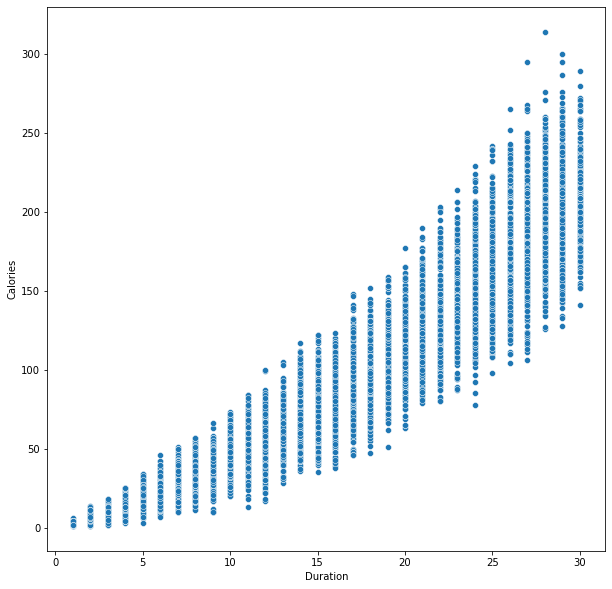

In [47]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Duration',y='Calories',data=df)

The relationship between Duration of exercise and Calories burned is Linear i.e More calories burn when the duration of exercise increases

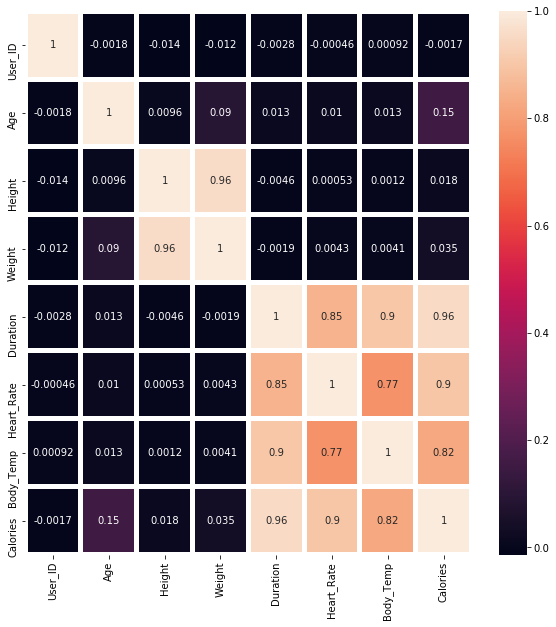

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=4)

Duration of exercise,Heart rate of the individual and Body temperature have a positive correlation with calories burned by the individual

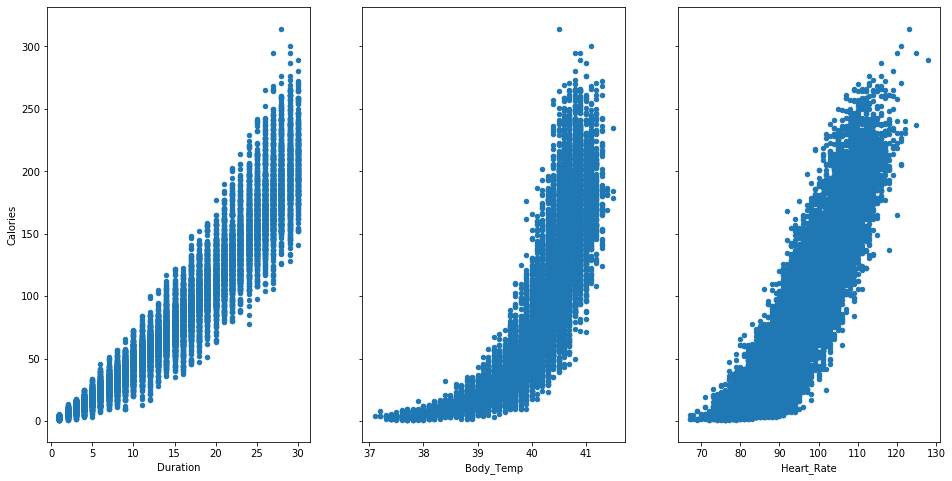

In [54]:
fig,ax=plt.subplots(1,3,sharey=True)
df.plot(kind='scatter',x='Duration',y='Calories',ax=ax[0],figsize=(16,8))
df.plot(kind='scatter',x='Body_Temp',y='Calories',ax=ax[1])
df.plot(kind='scatter',x='Heart_Rate',y='Calories',ax=ax[2])

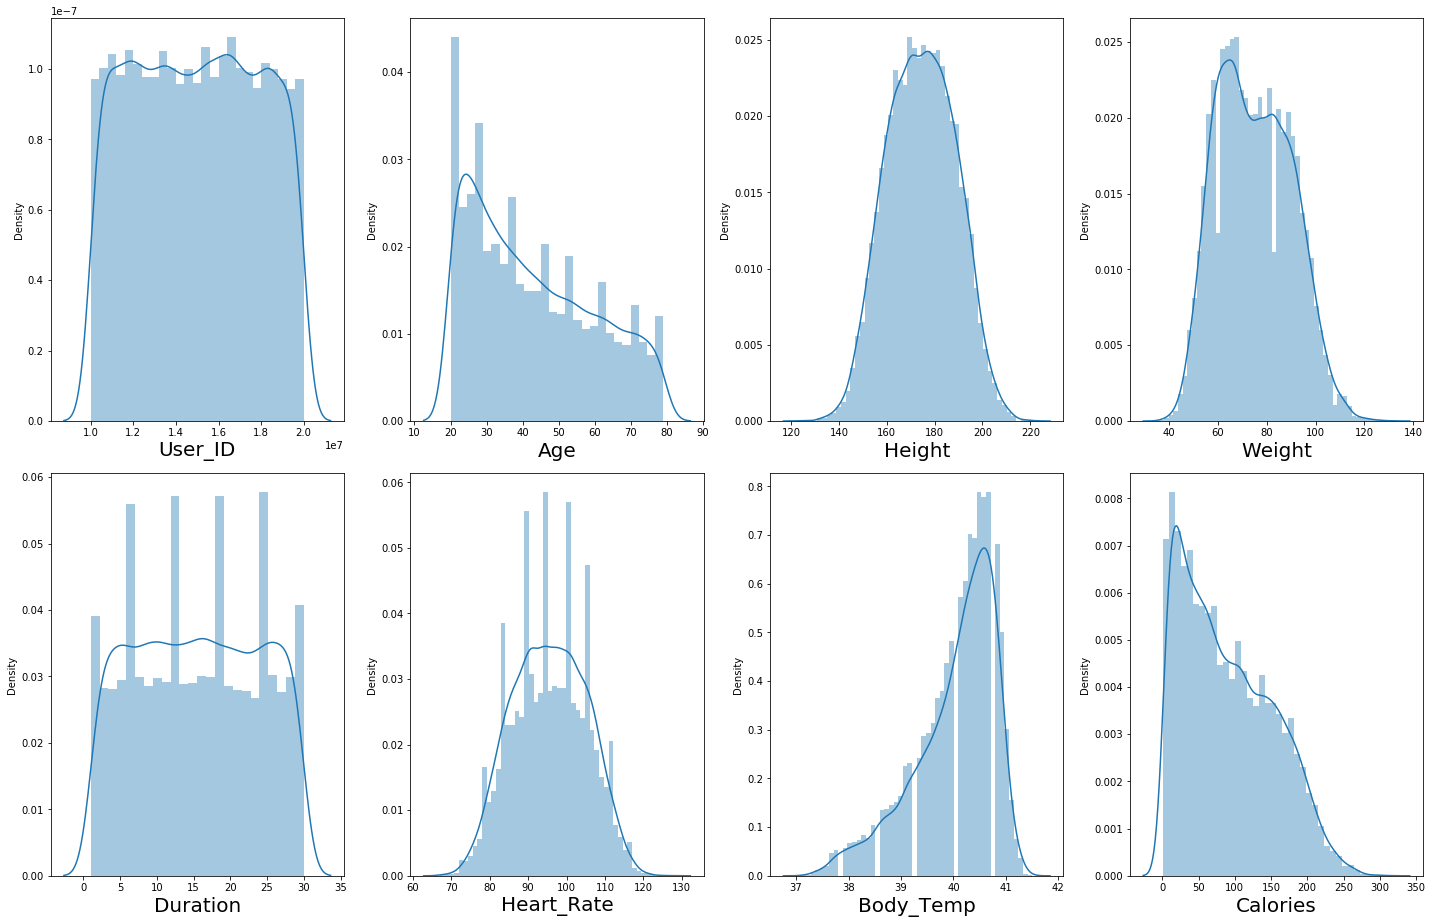

In [60]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if (df[column].dtypes=='int64' or df[column].dtypes=='float64'):
        if plotnumber<=8 :
            ax = plt.subplot(4,4,plotnumber)
            sns.distplot(df[column])
            plt.xlabel(column,fontsize=20)
        plotnumber+=1
    plt.tight_layout()

In [56]:
df.dtypes

User_ID         int64
Gender         object
Age             int64
Height          int64
Weight          int64
Duration        int64
Heart_Rate      int64
Body_Temp     float64
Calories        int64
dtype: object

In [61]:
df.drop(columns=['User_ID'],inplace=True)

In [62]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190,94,29,105,40.8,231
1,female,20,166,60,14,94,40.3,66
2,male,69,179,79,5,88,38.7,26
3,female,34,179,71,13,100,40.5,71
4,female,27,154,58,10,81,39.8,35


In [63]:
df['Gender']=pd.get_dummies(df['Gender'],drop_first=True)

In [64]:
df.head(5)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190,94,29,105,40.8,231
1,0,20,166,60,14,94,40.3,66
2,1,69,179,79,5,88,38.7,26
3,0,34,179,71,13,100,40.5,71
4,0,27,154,58,10,81,39.8,35


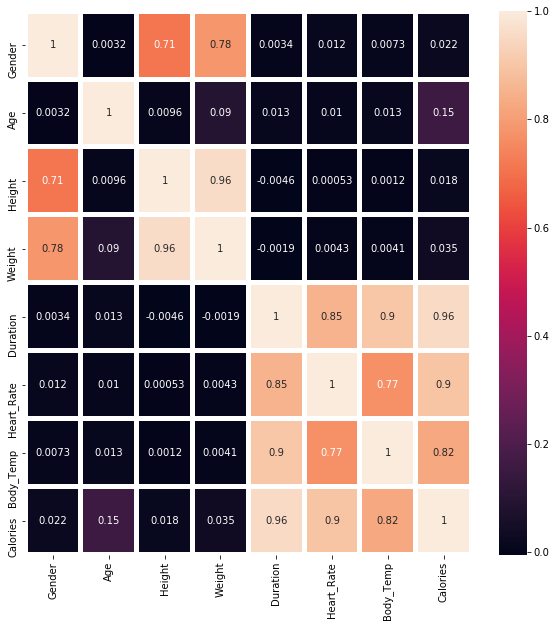

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=4)

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [68]:
final_df=df[[ 'Duration','Heart_Rate', 'Body_Temp', 'Calories']]

In [69]:
final_df.head()

,Duration,Heart_Rate,Body_Temp,Calories
0,29,105,40.8,231
1,14,94,40.3,66
2,5,88,38.7,26
3,13,100,40.5,71
4,10,81,39.8,35


In [70]:
scalar=StandardScaler()
var=['Duration','Heart_Rate', 'Body_Temp']
final_df[var]=scalar.fit_transform(final_df[var])
final_df.head(5)

,Duration,Heart_Rate,Body_Temp,Calories
0,1.619127,0.989404,0.994023,231
1,-0.183990,-0.158461,0.352342,66
2,-1.265861,-0.784569,-1.701035,26
3,-0.304198,0.467647,0.609015,71
4,-0.664821,-1.515029,-0.289338,35


In [71]:
y=final_df['Calories']
x=final_df.drop(columns='Calories')

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [73]:
reg_model=LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression()

In [74]:
y_pred=reg_model.predict(x_test)

In [75]:
data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
data

,Actual,Predicted
11499,173,172.147092
6475,189,201.678690
13167,53,48.881694
862,161,157.560852
5970,226,201.642356
...,...,...
2102,72,52.258073
13903,47,59.205849
11863,4,-3.614979
2656,101,119.150358


In [76]:
reg_model.score(x_train,y_train)

0.9467583997392838

In [77]:
reg_model.score(x_test,y_test)

0.9447554468268637

In [80]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 10.753296547401531
MSE: 218.82818810674212
RMSE: 14.792842462040285


In [87]:
prediction=reg_model.predict([[1.619127,0.989404,0.994023]])
prediction[0]

184.6656474025472

In [82]:
final_df.head()

,Duration,Heart_Rate,Body_Temp,Calories
0,1.619127,0.989404,0.994023,231
1,-0.183990,-0.158461,0.352342,66
2,-1.265861,-0.784569,-1.701035,26
3,-0.304198,0.467647,0.609015,71
4,-0.664821,-1.515029,-0.289338,35


In [88]:
reg_model.intercept_

89.48507542972087

In [89]:
final_df_unscaled=df[[ 'Duration','Heart_Rate', 'Body_Temp', 'Calories']]
final_df_unscaled

,Duration,Heart_Rate,Body_Temp,Calories
0,29,105,40.8,231
1,14,94,40.3,66
2,5,88,38.7,26
3,13,100,40.5,71
4,10,81,39.8,35
...,...,...,...,...
14995,11,92,40.4,45
14996,6,85,39.2,23
14997,16,90,40.1,75
14998,2,84,38.3,11


In [90]:
y1=final_df_unscaled['Calories']
x1=final_df_unscaled.drop(columns='Calories')

In [91]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.25,random_state=42)

In [92]:
reg_model_unscaled=LinearRegression()
reg_model_unscaled.fit(x1_train,y1_train)

LinearRegression()

In [93]:
y1_pred=reg_model_unscaled.predict(x1_test)
data_unscaled=pd.DataFrame({'Actual':y1_test,'Predicted':y1_pred})
data_unscaled

,Actual,Predicted
11499,173,172.147092
6475,189,201.678690
13167,53,48.881694
862,161,157.560852
5970,226,201.642356
...,...,...
2102,72,52.258073
13903,47,59.205849
11863,4,-3.614979
2656,101,119.150358


In [95]:
reg_model_unscaled.score(x1_test,y1_test)

0.9447554468268637

In [96]:
reg_model_unscaled.score(x1_train,y1_train)

0.9467583997392838

In [97]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y1_test, y1_pred))
print('MSE:', metrics.mean_squared_error(y1_test, y1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

MAE: 10.753296547401533
MSE: 218.82818810674215
RMSE: 14.792842462040287


In [98]:
reg_model.intercept_

89.48507542972087

In [109]:
prediction_unscaled=reg_model_unscaled.predict([[6,85,39.2]])
prediction_unscaled[0]

19.15946960560126

In [107]:
prediction=reg_model.predict([[0.056426,-0.575866,0.095670]])
prediction[0]

80.31250767601269

In [99]:
final_df_unscaled

,Duration,Heart_Rate,Body_Temp,Calories
0,29,105,40.8,231
1,14,94,40.3,66
2,5,88,38.7,26
3,13,100,40.5,71
4,10,81,39.8,35
...,...,...,...,...
14995,11,92,40.4,45
14996,6,85,39.2,23
14997,16,90,40.1,75
14998,2,84,38.3,11


In [106]:
final_df.iloc[14997]

Duration       0.056426
Heart_Rate    -0.575866
Body_Temp      0.095670
Calories      75.000000
Name: 14997, dtype: float64

In [ ]:
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [111]:
import pickle
filname='Calorie_burner_unscaled'
pickle.dump(reg_model_unscaled,open(filname,'wb'))

In [112]:
filename='Calorie_burner_scaled'
pickle.dump(reg_model,open(filename,'wb'))